# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [1]:
import pandas as pd

# Read the file
data = pd.read_csv("marketing_customer_analysis.csv")




# Create new dataframe that includes customers with claims greater than 1000 and marketing reposne is YES.
data2 = data[(data['Total Claim Amount'] > 1000) & (data['Response'] == 'Yes')]


display(data2)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
189,189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,NaN
236,236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A
419,419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A
442,442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,10351,FN44127,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10373,10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2/8/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury SUV,Medsize,NaN
10487,10487,IX60941,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,...,1.0,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10565,10565,QO62792,Oregon,7840.165778,Yes,Extended,College,1/14/11,Employed,M,...,2.0,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,NaN,NaN,NaN


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [2]:
# On the original dataframe calculate average total claim amount by gender and policy type for those who respsonded YES in the marketing campaign

examine_data = data[data['Response'] == 'Yes'].groupby(['Policy', 'Gender']).mean()['Total Claim Amount']
display(examine_data)


C:\Users\desgr\AppData\Local\Temp\ipykernel_24760\3676716718.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  examine_data = data[data['Response'] == 'Yes'].groupby(['Policy', 'Gender']).mean()['Total Claim Amount']


Policy        Gender
Corporate L1  F         463.942272
              M         426.482338
Corporate L2  F         441.345018
              M         427.988391
Corporate L3  F         421.231615
              M         391.613774
Personal L1   F         485.125282
              M         464.620881
Personal L2   F         439.905973
              M         459.430442
Personal L3   F         447.076355
              M         452.948421
Special L1    F         471.344049
              M         476.390378
Special L2    F         396.625189
              M         466.855864
Special L3    F         495.566135
              M         404.747560
Name: Total Claim Amount, dtype: float64

Claims seem resasonably evenly distributed by genders and policy types. Special L2 Females are a little lower Special L3 females are higher. Corporate L3 males are the lowest for that gender and the highest is Personal L1 for males.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [3]:
# Calculates total customers with policies in each state and returns the states with values great than 500 customers

policy_by_state = data['State'].value_counts()
filter_states = policy_by_state[policy_by_state > 500]
display(filter_states)


California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: State, dtype: int64

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [4]:
# Calculate the max, min and median for customer lifetime value by education level and gender

max_customer_value = data.groupby(['Education', 'Gender']).max()['Customer Lifetime Value']
min_customer_value = data.groupby(['Education', 'Gender']).min()['Customer Lifetime Value']
median_customer_value = data.groupby(['Education', 'Gender']).median()['Customer Lifetime Value']

display("Max Lifetime Value:\n", max_customer_value)
display("\nMin Lifetime Value:\n", min_customer_value)
display("\nMedian Lifetime Value:\n", median_customer_value)


C:\Users\desgr\AppData\Local\Temp\ipykernel_24760\2170985112.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_customer_value = data.groupby(['Education', 'Gender']).max()['Customer Lifetime Value']
C:\Users\desgr\AppData\Local\Temp\ipykernel_24760\2170985112.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  min_customer_value = data.groupby(['Education', 'Gender']).min()['Customer Lifetime Value']
C:\Users\desgr\AppData\Local\Temp\ipykernel_24760\2170985112.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only co

'Max Lifetime Value:\n'

Education             Gender
Bachelor              F         73225.95652
                      M         67907.27050
College               F         61850.18803
                      M         61134.68307
Doctor                F         44856.11397
                      M         32677.34284
High School or Below  F         55277.44589
                      M         83325.38119
Master                F         51016.06704
                      M         50568.25912
Name: Customer Lifetime Value, dtype: float64

'\nMin Lifetime Value:\n'

Education             Gender
Bachelor              F         1904.000852
                      M         1898.007675
College               F         1898.683686
                      M         1918.119700
Doctor                F         2395.570000
                      M         2267.604038
High School or Below  F         2144.921535
                      M         1940.981221
Master                F         2417.777032
                      M         2272.307310
Name: Customer Lifetime Value, dtype: float64

'\nMedian Lifetime Value:\n'

Education             Gender
Bachelor              F         5640.505303
                      M         5548.031892
College               F         5623.611187
                      M         6005.847375
Doctor                F         5332.462694
                      M         5577.669457
High School or Below  F         6039.553187
                      M         6286.731006
Master                F         5729.855012
                      M         5579.099207
Name: Customer Lifetime Value, dtype: float64

INSIGHTS: The median high school or below value for the male cohort is higher than the other groups, this may be worth investigation to see if there are any other apsects that make this group higher.

**Lab | Customer Analysis Round 3
For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

Show DataFrame info.
Describe DataFrame.
Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [6]:
# Shows DataFrame info

display(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

None

In [7]:
# Description/Stats for dataframe

display(data.describe())

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


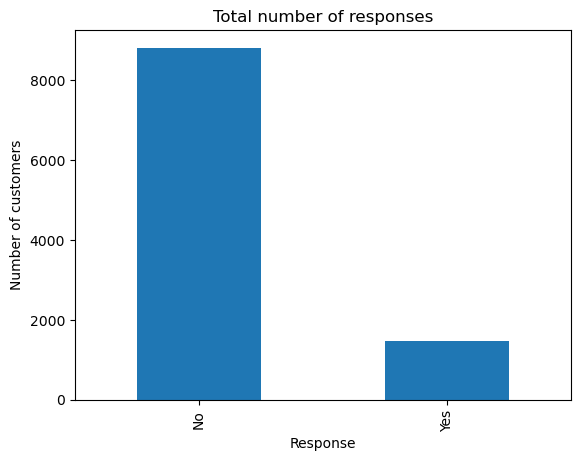

In [10]:
# Plot the number of responses
import matplotlib.pyplot as plt


data['Response'].value_counts().plot(kind='bar')
plt.title('Total number of responses')
plt.ylabel('Number of customers')
plt.xlabel('Response')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

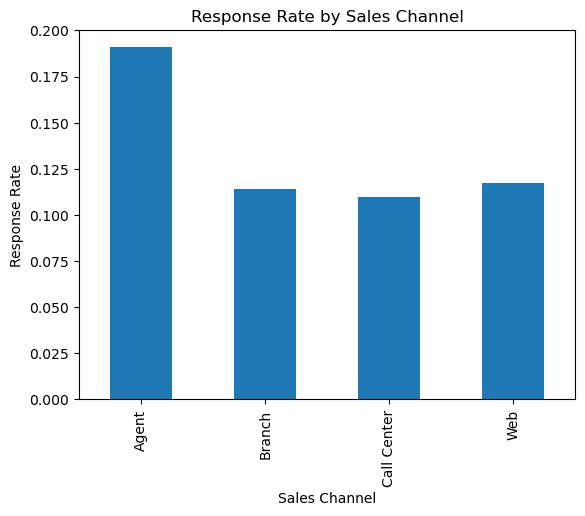

In [18]:
# Shows a plot of the response rate by the sales channel

response_by_channel = data.groupby('Sales Channel') ['Response'].value_counts(normalize=True).unstack()
response_by_channel ['Yes'].plot(kind='bar')
plt.title('Response Rate by Sales Channel')
plt.ylabel('Response Rate')
plt.xlabel('Sales Channel')
plt.show

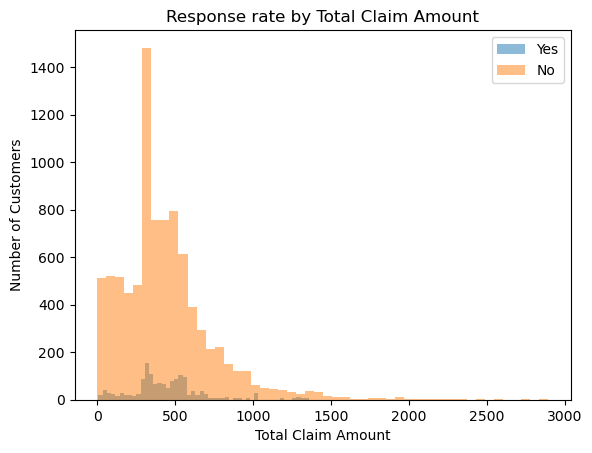

In [22]:
# Shows a plot of the response rate by the total claim amount. Histogram would likely be best here

plt.hist(data[data['Response'] == 'Yes']['Total Claim Amount'], bins=50, alpha=0.5, label='Yes')
plt.hist(data[data['Response'] == 'No']['Total Claim Amount'], bins=50, alpha=0.5, label='No')
plt.title('Response rate by Total Claim Amount')
plt.ylabel('Number of Customers')
plt.xlabel('Total Claim Amount')
plt.legend(loc='upper right')
plt.show()


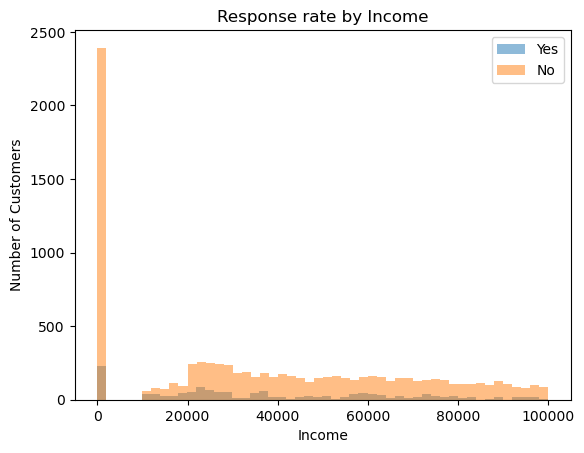

In [24]:
# Shows a plot of the response rate by income

plt.hist(data[data['Response'] == 'Yes']['Income'], bins=50, alpha=0.5, label='Yes')
plt.hist(data[data['Response'] == 'No']['Income'], bins=50, alpha=0.5, label='No')
plt.title('Response rate by Income')
plt.ylabel('Number of Customers')
plt.xlabel('Income')
plt.legend(loc='upper right')
plt.show()


## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [5]:
# your code goes here